In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
torch.manual_seed(1)



In [3]:
def load_data(train_batch_size, test_batch_size):
    trainset = datasets.MNIST('data', train=True, download=False,
                              transform=transforms.Compose([
                                  transforms.Resize((32, 32)),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))
    temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    trainset.targets = temp
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train=False,
                             transform=transforms.Compose([
                                 transforms.Resize((32, 32)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))
    test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)

    return train_loader, test_loader

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [5]:
def train(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data
        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()

    train_loss = (train_loss * 100) / len(train_loader.dataset)
    acc = 100.0 * correct / len(train_loader.dataset)
    return train_loss, acc

In [6]:
def test(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()

    test_loss = (test_loss * 100) / len(test_loader.dataset)
    return test_loss


In [7]:
train_batch_size = 100
test_batch_size = 64
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = torch.nn.CrossEntropyLoss()

m1_train_loss_arr = []
m1_test_loss_arr = []

epochs = 100
for epoch in range(1, epochs + 1):
    tr_loss, acc = train(model, optimizer, train_loader)
    m1_train_loss_arr.append(tr_loss)
    loss_test = test(model, epoch, test_loader)
    m1_test_loss_arr.append(loss_test)
    print(f'Epoch {epoch}, Train Loss: {tr_loss}, Test Loss: {loss_test}')

Epoch 1, Train Loss: 2.303112030029297, Test Loss: 3.6174981594085693
Epoch 2, Train Loss: 2.3023221492767334, Test Loss: 3.621344804763794
Epoch 3, Train Loss: 2.3018741607666016, Test Loss: 3.6188902854919434
Epoch 4, Train Loss: 2.3013741970062256, Test Loss: 3.6224381923675537
Epoch 5, Train Loss: 2.3007454872131348, Test Loss: 3.627885103225708
Epoch 6, Train Loss: 2.2998852729797363, Test Loss: 3.624145269393921
Epoch 7, Train Loss: 2.2989208698272705, Test Loss: 3.627685070037842
Epoch 8, Train Loss: 2.2976443767547607, Test Loss: 3.627434730529785
Epoch 9, Train Loss: 2.2961971759796143, Test Loss: 3.638810634613037
Epoch 10, Train Loss: 2.294741630554199, Test Loss: 3.6368820667266846
Epoch 11, Train Loss: 2.292922019958496, Test Loss: 3.631753444671631
Epoch 12, Train Loss: 2.2908456325531006, Test Loss: 3.6456100940704346
Epoch 13, Train Loss: 2.288675546646118, Test Loss: 3.6570632457733154
Epoch 14, Train Loss: 2.286256790161133, Test Loss: 3.648157835006714
Epoch 15, Trai

In [8]:
temp_1 = np.array(m1_train_loss_arr)
temp_2 = np.array(m1_test_loss_arr)

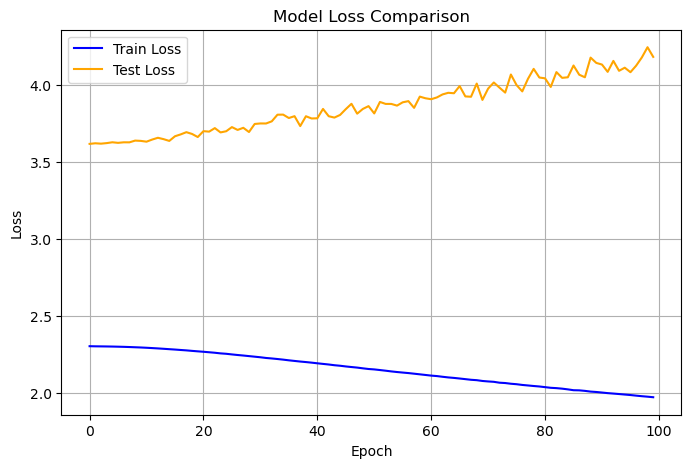

In [9]:
# Plot the loss values similar to your screenshot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(temp_1), 1), temp_1, color="b", label="Train Loss")
plt.plot(np.arange(0, len(temp_2), 1), temp_2, color="orange", label="Test Loss")
plt.title('Model Loss Comparison')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()